<a href="https://colab.research.google.com/github/kangdoung/CS114.K21/blob/master/Do_an_cuoi_ky_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import cv2 #open cv
import os
import matplotlib.pyplot as plt


In [ ]:
# scaling all images to 47 * 62 using OpenCV resize function
for imgfolder in os.listdir('drive/My Drive/Image Processing/Train/'):
    for filename in os.listdir('drive/My Drive/Image Processing/Train/' + imgfolder):
        filename = 'drive/My Drive/Image Processing/Train/' + imgfolder+ '/'+ filename
        img=cv2.imread(filename,0)
        img = cv2.resize(img, (42,67), interpolation = cv2.INTER_AREA)

In [ ]:
# building an array of images and finding its shape.
X_images = []
for imgfolder in os.listdir('drive/My Drive/Image Processing/Train/'):
    for filename in os.listdir('drive/My Drive/Image Processing/Train/' + imgfolder):
        filename = 'drive/My Drive/Image Processing/Train/' + imgfolder + '/' + filename
        #print(filename)
        img = cv2.imread(filename,0)
        img = cv2.resize(img, (42,67), interpolation = cv2.INTER_AREA)
        X_images.append(img)
X_images = np.asarray(X_images)
X_images.shape

(74, 216, 216)

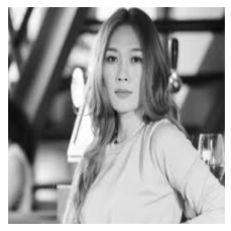

In [ ]:
plt.imshow(X_images[20], cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [ ]:
y_train = []
for imgfolder in os.listdir('drive/My Drive/Image Processing/Train/'):
    for filename in os.listdir('drive/My Drive/Image Processing/Train/' + imgfolder):
        y_train.append(imgfolder)
y_train = np.asarray(y_train)
y_train.shape

(74,)

In [ ]:
#Build array of images for Test/Validation dataset
X_test = []
for imgfolder in os.listdir('drive/My Drive/Image Processing/Val/'):
    for filename in os.listdir('drive/My Drive/Image Processing/Val/' + imgfolder):
         if(filename.endswith('.jpg')):
                filename = 'drive/My Drive/Image Processing/Val/' + imgfolder + '/' + filename
                #print(filename)
                img = cv2.imread(filename,0)
                img = cv2.resize(img, (42,67), interpolation = cv2.INTER_AREA)
                X_test.append(img)
X_test = np.asarray(X_test)

In [ ]:
#Building a 1D array of test labels
y_test = []
for imgfolder in os.listdir('drive/My Drive/Image Processing/Val/'):
    for filename in os.listdir('drive/My Drive/Image Processing/Val/' + imgfolder):
        y_test.append(imgfolder)
y_test = np.asarray(y_test)

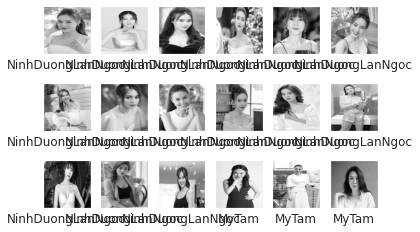

In [ ]:
#display training images and labels to make sure they lineup correctly
%matplotlib inline
import seaborn as sns; sns.set()

fig,ax = plt.subplots(3,6)
for i, axis in enumerate(ax.flat):
    axis.imshow(X_images[i], cmap= 'gray')
    axis.set(xticks = [], yticks=[], xlabel=y_train[i])

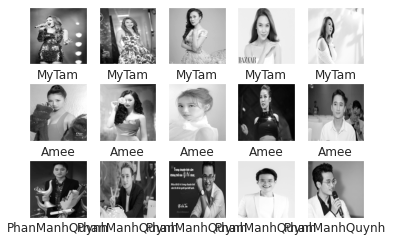

In [ ]:
#display test images and labels to make sure they lineup correctly
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i], cmap='gray')
    axi.set(xticks=[], yticks=[],
            xlabel=y_test[i])

In [ ]:
from sklearn.decomposition import PCA as RandomizedPCA

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# code for the SVC Face recognition example.
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
#extracting only 10 features out of 47*62 = 2914 features


pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
#flatten images.
X_data = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

In [ ]:
from sklearn.model_selection import learning_curve, GridSearchCV

In [ ]:
# doing cross validation to tune the params of SVC

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

grid.fit(X_data, y_train)
print(grid.best_params_)

ValueError: ignored

In [ ]:
grid.best_score_


nan

In [ ]:
# pick the best model from the grid search above and use it to classify the test dataset
yfit = model.predict(X_test)

In [ ]:
yfit

array(['PhanManhQuynh', 'Amee', 'NinhDuongLanNgoc', 'NinhDuongLanNgoc',
       'NinhDuongLanNgoc', 'NinhDuongLanNgoc', 'Amee', 'NinhDuongLanNgoc',
       'HaAnhTuan', 'MyTam', 'HaAnhTuan', 'MyTam', 'HaAnhTuan',
       'NinhDuongLanNgoc', 'NinhDuongLanNgoc', 'HaAnhTuan', 'HaAnhTuan',
       'NinhDuongLanNgoc', 'NinhDuongLanNgoc', 'NinhDuongLanNgoc',
       'PhanManhQuynh', 'NinhDuongLanNgoc'], dtype='<U16')

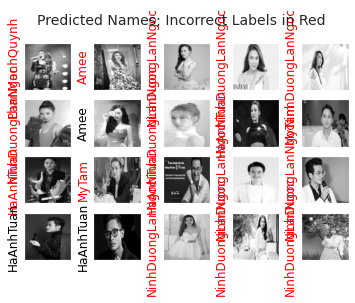

In [ ]:
fig, ax = plt.subplots(4, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(X_test[i].reshape(216, 216), cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(yfit[i].split()[-1],
                   color='black' if yfit[i] == y_test[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);